In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import tensorflow as tf 

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 

In [3]:
df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/RELIANCE.NS?period1=1462320000&period2=1620086400&interval=1d&events=history&includeAdjustedClose=true')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-04,482.451843,487.231537,481.931763,484.457825,473.572998,6251608.0
1,2016-05-05,485.398895,487.107697,480.891632,483.046204,472.193115,9998709.0
2,2016-05-06,481.931763,483.813934,478.959930,479.925781,469.142792,6806351.0
3,2016-05-09,482.922363,488.370728,481.832703,486.934357,475.993896,7082682.0
4,2016-05-10,486.934357,487.726837,484.408295,486.661926,475.727600,3345090.0
...,...,...,...,...,...,...,...
1229,2021-04-27,1940.000000,1997.199951,1938.250000,1988.650024,1988.650024,9226547.0
1230,2021-04-28,1997.849976,2008.000000,1980.150024,1997.300049,1997.300049,7902002.0
1231,2021-04-29,2022.900024,2044.500000,2007.300049,2024.050049,2024.050049,8035915.0
1232,2021-04-30,2008.500000,2036.000000,1987.550049,1994.500000,1994.500000,9150974.0


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-04,482.451843,487.231537,481.931763,484.457825,473.572998,6251608.0
1,2016-05-05,485.398895,487.107697,480.891632,483.046204,472.193115,9998709.0
2,2016-05-06,481.931763,483.813934,478.959930,479.925781,469.142792,6806351.0
3,2016-05-09,482.922363,488.370728,481.832703,486.934357,475.993896,7082682.0
4,2016-05-10,486.934357,487.726837,484.408295,486.661926,475.727600,3345090.0


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1229,2021-04-27,1940.000000,1997.199951,1938.250000,1988.650024,1988.650024,9226547.0
1230,2021-04-28,1997.849976,2008.000000,1980.150024,1997.300049,1997.300049,7902002.0
1231,2021-04-29,2022.900024,2044.500000,2007.300049,2024.050049,2024.050049,8035915.0
1232,2021-04-30,2008.500000,2036.000000,1987.550049,1994.500000,1994.500000,9150974.0
1233,2021-05-03,1966.000000,1979.000000,1943.099976,1959.050049,1959.050049,10909942.0


In [6]:
df.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1232 non-null   object 
 1   Open       1232 non-null   float64
 2   High       1232 non-null   float64
 3   Low        1232 non-null   float64
 4   Close      1232 non-null   float64
 5   Adj Close  1232 non-null   float64
 6   Volume     1232 non-null   float64
dtypes: float64(6), object(1)
memory usage: 77.0+ KB


In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1.232000e+03
mean,1164.167614,1177.963262,1149.297977,1162.961052,1153.958036,1.034071e+07
std,506.617352,512.972552,498.242651,504.939326,509.196874,7.604024e+06
min,459.667816,465.933411,458.479065,460.633667,450.284119,1.296168e+06
25%,774.972809,783.306274,769.282959,775.486649,763.621765,5.814978e+06
50%,1105.000671,1120.999023,1093.732483,1107.179993,1099.490845,8.093450e+06
75%,1448.452880,1463.316711,1427.824676,1445.052399,1439.646789,1.192802e+07
max,2325.000000,2369.350098,2310.550049,2324.550049,2324.550049,6.584835e+07


In [11]:
df['Date'] =pd.to_datetime(df['Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1232 non-null   datetime64[ns]
 1   Open       1232 non-null   float64       
 2   High       1232 non-null   float64       
 3   Low        1232 non-null   float64       
 4   Close      1232 non-null   float64       
 5   Adj Close  1232 non-null   float64       
 6   Volume     1232 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 77.0 KB


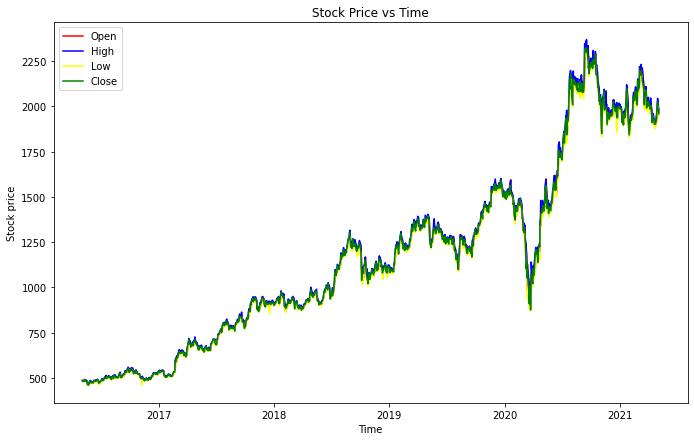

In [13]:
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
plt.plot(df['Date'],df['Open'].values , color ='r' , label = 'Open')
plt.plot(df['Date'],df['High'].values , color ='blue' , label = 'High')
plt.plot(df['Date'],df['Low'].values , color ='yellow' , label = 'Low')
plt.plot(df['Date'],df['Close'].values , color ='green' , label = 'Close')
plt.title('Stock Price vs Time')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()

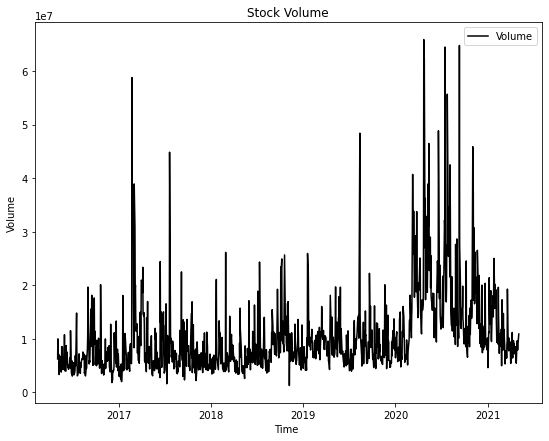

In [14]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,2);
plt.plot(df['Date'],df['Volume'].values, color='black', label='Volume')
plt.title('Stock Volume')
plt.xlabel('Time ')
plt.ylabel('Volume')
plt.legend()

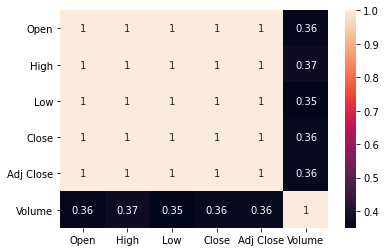

In [15]:
cor = sns.heatmap(df.corr(),annot=True)

In [46]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999470,0.999507,0.998985,0.998980,0.358058
High,0.999470,1.000000,0.999324,0.999614,0.999623,0.373272
Low,0.999507,0.999324,1.000000,0.999553,0.999522,0.350091
Close,0.998985,0.999614,0.999553,1.000000,0.999985,0.363850
Adj Close,0.998980,0.999623,0.999522,0.999985,1.000000,0.364748
Volume,0.358058,0.373272,0.350091,0.363850,0.364748,1.000000


In [16]:
x = df.iloc[:,1:5].values.reshape(-4,4)
#y = df.iloc[:,5].values.reshape(-1,1)
y = df[['Date','Adj Close']]

In [17]:
x

array([[ 482.451843,  487.231537,  481.931763,  484.457825],
       [ 485.398895,  487.107697,  480.891632,  483.046204],
       [ 481.931763,  483.813934,  478.95993 ,  479.925781],
       ...,
       [2022.900024, 2044.5     , 2007.300049, 2024.050049],
       [2008.5     , 2036.      , 1987.550049, 1994.5     ],
       [1966.      , 1979.      , 1943.099976, 1959.050049]])

In [18]:
y

,Date,Adj Close
0,2016-05-04,473.572998
1,2016-05-05,472.193115
2,2016-05-06,469.142792
3,2016-05-09,475.993896
4,2016-05-10,475.727600
...,...,...
1229,2021-04-27,1988.650024
1230,2021-04-28,1997.300049
1231,2021-04-29,2024.050049
1232,2021-04-30,1994.500000


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [20]:
y_train

,Date,Adj Close
592,2018-09-21,1194.938599
406,2017-12-20,895.612854
814,2019-08-21,1254.306030
270,2017-06-06,635.626831
254,2017-05-15,650.781555
...,...,...
763,2019-06-07,1290.533813
835,2019-09-23,1222.971924
1218,2021-04-08,2005.349976
559,2018-08-01,1170.254639


In [28]:
y_train_dates = y_train.iloc[:,0].values.reshape(-1,1)
y_train_close = y_train.iloc[:,1].values.reshape(-1,1)

In [29]:
x_train.shape

(985, 4)

985 training data samples 

In [30]:
y_train_close

array([[1194.938599],
       [ 895.612854],
       [1254.30603 ],
       [ 635.626831],
       [ 650.781555],
       [ 495.820923],
       [1255.789673],
       [1269.039673],
       [ 920.194214],
       [2156.199951],
       [ 908.976563],
       [ 460.548676],
       [2067.100098],
       [ 940.825134],
       [1334.994385],
       [1760.349976],
       [ 505.238159],
       [1099.164673],
       [ 524.702087],
       [ 907.903564],
       [ 496.93454 ],
       [2150.600098],
       [1100.47229 ],
       [1089.185425],
       [1188.510132],
       [1090.16687 ],
       [2085.800049],
       [ 516.325745],
       [ 904.245605],
       [1293.134766],
       [2131.550049],
       [1218.935669],
       [1941.      ],
       [1541.939453],
       [1453.019287],
       [ 937.996216],
       [1193.564575],
       [ 639.790771],
       [1194.499756],
       [ 647.489136],
       [2298.75    ],
       [ 648.312256],
       [1237.923462],
       [ 972.673706],
       [ 508.869507],
       [12

In [31]:
y_test

,Date,Adj Close
18,2016-05-30,469.021790
342,2017-09-19,818.015442
467,2018-03-21,874.884399
851,2019-10-17,1378.211914
951,2020-03-12,1049.079346
...,...,...
717,2019-03-27,1324.247314
427,2018-01-19,908.440125
903,2020-01-02,1515.194214
875,2019-11-22,1526.247559


NOTE: We have taken Date and Adj close column in 'y' just so that it's easier for us to plot the stock prices along with their dates in the future. Later, I've further split y_train and y_test into dates and close so that from now onwards y_train_close and y_test_close contain the stock  values and we need not worry about y_train_dates and y_test_dates.

In [32]:
y_test_dates = y_test.iloc[:,0].values.reshape(-1,1)
y_test_close = y_test.iloc[:,1].values.reshape(-1,1)

In [33]:
y_test_close

array([[ 469.02179 ],
       [ 818.015442],
       [ 874.884399],
       [1378.211914],
       [1049.079346],
       [1235.767822],
       [1108.962036],
       [ 487.202576],
       [1318.211182],
       [1985.599976],
       [ 472.265747],
       [1366.990234],
       [ 773.046997],
       [2084.550049],
       [ 487.250977],
       [2101.699951],
       [1351.041382],
       [1228.848389],
       [2026.949951],
       [1360.267212],
       [1129.965454],
       [1182.903564],
       [ 854.936462],
       [ 901.806946],
       [2175.850098],
       [2175.800049],
       [ 882.15155 ],
       [1460.470459],
       [2122.050049],
       [1899.5     ],
       [1466.742676],
       [1987.199951],
       [1440.142578],
       [1721.386475],
       [1293.880981],
       [ 898.441711],
       [1514.66272 ],
       [1134.79187 ],
       [ 897.710083],
       [1072.304199],
       [1993.75    ],
       [1517.760132],
       [ 572.659729],
       [1435.360474],
       [ 478.317902],
       [11

Scaling the splitted data


Why do we scale the data after splitting and not before?
The reason this is erroneous is that the normalization technique will use data from the validation and test sets as a reference point when scaling the data as a whole. This will inadvertently influence the values of the training data, essentially resulting in data leakage from the validation and test sets.

In [34]:
scalar_x = MinMaxScaler()
scalar_y = MinMaxScaler()

scalar_x.fit(x_train)
x_train_scaled = scalar_x.transform(x_train)
x_test_scaled = scalar_x.transform(x_test)
print(x_train_scaled)

scalar_y.fit(y_train_close)
y_train_scaled = scalar_y.transform(y_train_close)
y_test_scaled = scalar_y.transform(y_test_close)
print(y_train_scaled)

[[0.39945672 0.40117252 0.3893963  0.40115562]
 [0.24341666 0.23904033 0.24540059 0.24157299]
 [0.42961594 0.4227465  0.43424297 0.42964967]
 ...
 [0.83124865 0.82154798 0.83699421 0.83128977]
 [0.38423072 0.38312873 0.39042287 0.38774824]
 [0.43832036 0.43621398 0.4407809  0.4406315 ]]
[[0.39851656]
 [0.23832647]
 [0.43028821]
 [0.09918981]
 [0.10730016]
 [0.02436992]
 [0.43108221]
 [0.43817321]
 [0.25148167]
 [0.91295456]
 [0.24547832]
 [0.00549328]
 [0.86527101]
 [0.26252272]
 [0.47347018]
 [0.70110763]
 [0.02940974]
 [0.34726125]
 [0.03982625]
 [0.24490409]
 [0.02496589]
 [0.90995769]
 [0.34796105]
 [0.34192066]
 [0.39507624]
 [0.3424459 ]
 [0.87527866]
 [0.03534348]
 [0.24294646]
 [0.45106818]
 [0.89976268]
 [0.41135906]
 [0.79778606]
 [0.58422092]
 [0.53663354]
 [0.26100876]
 [0.39778122]
 [0.10141823]
 [0.3982817 ]
 [0.10553816]
 [0.98924304]
 [0.10597867]
 [0.42152076]
 [0.27956711]
 [0.03135313]
 [0.40469884]
 [0.53977609]
 [0.32214721]
 [0.46669439]
 [0.16727769]
 [0.43031467

NN Model

In [35]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(5,activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(4925,activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(1,activation= tf.nn.relu))

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

history = model.fit(x_train_scaled, y_train_scaled, epochs=30, batch_size=150, verbose=1, validation_split=0.2)

predictions = model.predict(x_test_scaled)

Epoch 1/30
6/6 [==============================] - 1s 50ms/step - loss: 0.2259 - mse: 0.2259 - mae: 0.3818 - val_loss: 0.1761 - val_mse: 0.1761 - val_mae: 0.3365
Epoch 2/30
6/6 [==============================] - 0s 14ms/step - loss: 0.1115 - mse: 0.1115 - mae: 0.2436 - val_loss: 0.0188 - val_mse: 0.0188 - val_mae: 0.1366
Epoch 3/30
6/6 [==============================] - 0s 14ms/step - loss: 0.0278 - mse: 0.0278 - mae: 0.1629 - val_loss: 0.0057 - val_mse: 0.0057 - val_mae: 0.0751
Epoch 4/30
6/6 [==============================] - 0s 14ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0542 - val_loss: 0.0135 - val_mse: 0.0135 - val_mae: 0.0984
Epoch 5/30
6/6 [==============================] - 0s 14ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0804 - val_loss: 1.5229e-04 - val_mse: 1.5229e-04 - val_mae: 0.0106
Epoch 6/30
6/6 [==============================] - 0s 15ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0295 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0494
Epoch 7/30
6/6 [==========

In [36]:
model.evaluate(x_test_scaled, y_test_scaled)

8/8 [==============================] - 0s 2ms/step - loss: 2.5139e-05 - mse: 2.5139e-05 - mae: 0.0039


[2.513946128601674e-05, 2.513946128601674e-05, 0.003926570992916822]

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 25        
_________________________________________________________________
dense_1 (Dense)              (None, 4925)              29550     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4926      
Total params: 34,501
Trainable params: 34,501
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


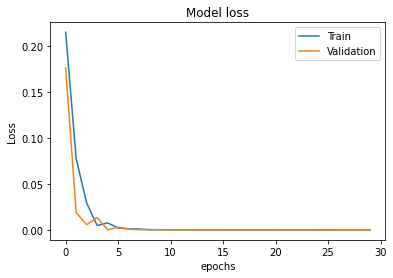

In [38]:
print(history.history.keys())
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Both the training and validation loss decrease in an exponential fashion as the number of epochs is increased, suggesting that the model gains a high degree of accuracy as our epochs (or number of forward and backward passes) is increased.

In [39]:
predictions = scalar_y.inverse_transform(predictions)
predictions

array([[ 460.54074],
       [ 825.01013],
       [ 880.5306 ],
       [1369.9126 ],
       [1050.1118 ],
       [1245.1825 ],
       [1106.2966 ],
       [ 482.8331 ],
       [1327.297  ],
       [1987.353  ],
       [ 462.21823],
       [1366.0942 ],
       [ 767.82306],
       [2068.2056 ],
       [ 481.78568],
       [2088.38   ],
       [1346.3763 ],
       [1237.9137 ],
       [2017.4965 ],
       [1361.3188 ],
       [1137.5957 ],
       [1183.5485 ],
       [ 862.60693],
       [ 901.67456],
       [2172.731  ],
       [2189.2026 ],
       [ 897.57697],
       [1459.9731 ],
       [2122.088  ],
       [1918.3534 ],
       [1461.2341 ],
       [1980.8676 ],
       [1430.0607 ],
       [1730.9655 ],
       [1282.4744 ],
       [ 906.8272 ],
       [1502.7542 ],
       [1152.3092 ],
       [ 902.5325 ],
       [1072.593  ],
       [1980.3165 ],
       [1518.3391 ],
       [ 577.4366 ],
       [1442.5609 ],
       [ 470.80005],
       [1184.3093 ],
       [1533.3289 ],
       [1051.

In [40]:
predictions.shape

(247, 1)

In [41]:
np.concatenate((y_test_close,predictions),axis=1)

array([[ 469.02179   ,  460.54074097],
       [ 818.015442  ,  825.01013184],
       [ 874.884399  ,  880.53057861],
       [1378.211914  , 1369.91259766],
       [1049.079346  , 1050.11181641],
       [1235.767822  , 1245.18249512],
       [1108.962036  , 1106.29663086],
       [ 487.202576  ,  482.83309937],
       [1318.211182  , 1327.29699707],
       [1985.599976  , 1987.35302734],
       [ 472.265747  ,  462.2182312 ],
       [1366.990234  , 1366.09423828],
       [ 773.046997  ,  767.82305908],
       [2084.550049  , 2068.20556641],
       [ 487.250977  ,  481.78567505],
       [2101.699951  , 2088.37988281],
       [1351.041382  , 1346.37634277],
       [1228.848389  , 1237.91369629],
       [2026.949951  , 2017.49645996],
       [1360.267212  , 1361.31884766],
       [1129.965454  , 1137.59570312],
       [1182.903564  , 1183.54846191],
       [ 854.936462  ,  862.60693359],
       [ 901.806946  ,  901.67456055],
       [2175.850098  , 2172.73095703],
       [2175.800049  , 21

In [42]:
mae = mean_absolute_error(y_test_close,predictions)
mse = mean_squared_error(y_test_close,predictions)
rmse = math.sqrt(mse)
print('MAE : %f , MSE : %f, RMSE: %f'%(mae,mse,rmse))

MAE : 7.337055 , MSE : 87.775410, RMSE: 9.368853


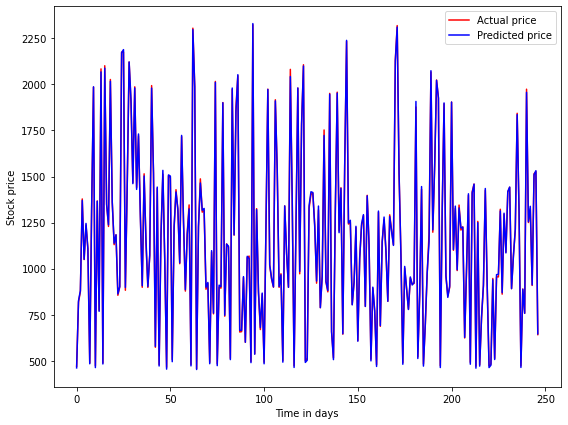

In [43]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(y_test_close,color='r',label='Actual price')
plt.plot(predictions,color='b',label='Predicted price')
plt.xlabel('Time in days')
plt.ylabel('Stock price')
plt.legend()
plt.show()